In [56]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [57]:
train_dataset = torchvision.datasets.FashionMNIST("./data", download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=transforms.ToTensor())

In [58]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

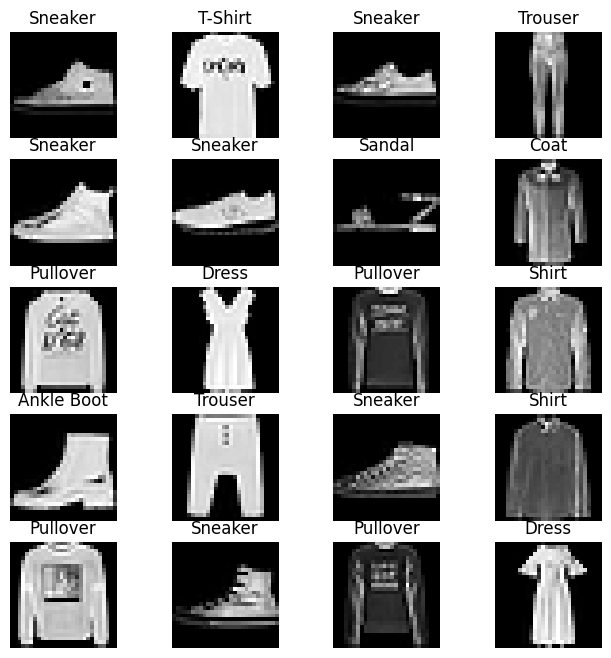

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns * rows + 1):
    img_xy = np.random.randint(len(train_dataset))
    label = train_dataset.targets[img_xy]
    img = train_dataset.data[img_xy]  # Convert to numpy and ensure uint8 format
    img = train_dataset.data[img_xy].numpy()

    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[label.item()])  # 레이블 매핑
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [60]:
class FashionDNN(nn.Module):

    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=256)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        out = x.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [61]:
learning_rate = 0.001
model = FashionDNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [62]:
num_epochs = 5
count = 0
lost_list = []
iteration_list = []
accuracy_list = []

prediction_list = []
labels_list = []

for epoch in range(num_epochs):
    for i in range(0,len(train_dataset),100):
        data = train_dataset.data[i:i+100].type(torch.FloatTensor)
        targets = train_dataset.targets[i:i+100]
        train = Variable(data.view(100, 1, 28, 28))
        labels = Variable(targets)

        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count = count + 1

        if not (count % 50):
            total = 0
            correct = 0
            for j in range(0, len(train_dataset), 100):
                test_data = train_dataset.data[j:j+100].type(torch.FloatTensor)
                test_targets = train_dataset.targets[j:j+100]
                labels_list.append(test_targets)
                test = Variable(test_data.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1]
                prediction_list.append(predictions)
                correct += (predictions == test_targets).sum()
                total += len(test_targets)

            accuracy = correct * 100 / total
            lost_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print(f'Iteration: {count}, Accuracy: {accuracy}, Loss: {loss.data}')

Iteration: 500, Accuracy: 79.49166870117188, Loss: 0.7750322818756104
Iteration: 1000, Accuracy: 81.038330078125, Loss: 0.5927988290786743
Iteration: 1500, Accuracy: 79.00833129882812, Loss: 0.5271856188774109
Iteration: 2000, Accuracy: 82.24500274658203, Loss: 0.5465476512908936
Iteration: 2500, Accuracy: 83.25333404541016, Loss: 0.4279073476791382
Iteration: 3000, Accuracy: 84.32833099365234, Loss: 0.35146862268447876
